In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [3]:
titanic_data = pd.read_csv("titanic.csv")

# Analyzing data

In [4]:
titanic_data.head(10)

,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C


In [5]:
titanic_data.shape

(1309, 11)

In [6]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Survived  1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   Sibsp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [7]:
cleaned_data_set= titanic_data.drop (columns = ['Name', 'Sibsp', 'Parch','Ticket','Cabin'], axis = '1')
cleaned_data_set.head()

,Pclass,Survived,Sex,Age,Fare,Embarked
0,1,1,female,29.0000,211.3375,S
1,1,1,male,0.9167,151.5500,S
2,1,0,female,2.0000,151.5500,S
3,1,0,male,30.0000,151.5500,S
4,1,0,female,25.0000,151.5500,S


# Visualizing data

<AxesSubplot:xlabel='Survived', ylabel='count'>

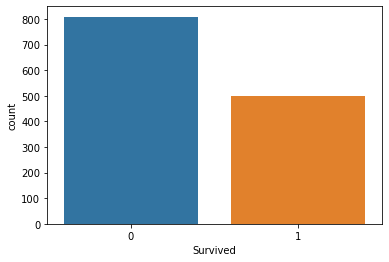

In [8]:
sns.countplot(x="Survived", data=titanic_data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

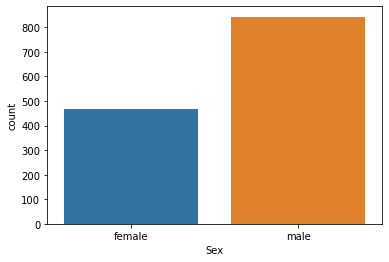

In [9]:
sns.countplot(x="Sex", data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

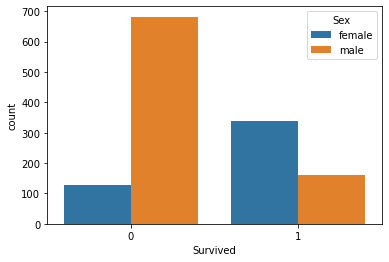

In [10]:
sns.countplot(x="Survived", hue="Sex", data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

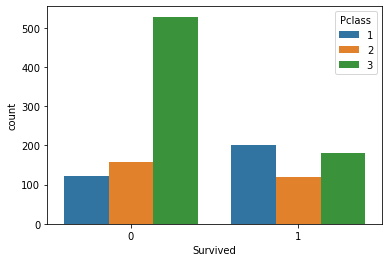

In [11]:
sns.countplot(x="Survived", hue="Pclass", data=titanic_data)

<AxesSubplot:ylabel='Frequency'>

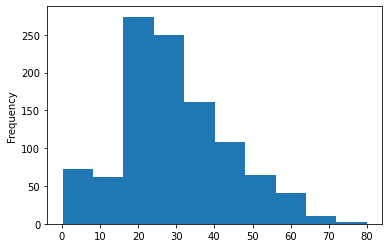

In [12]:
titanic_data["Age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

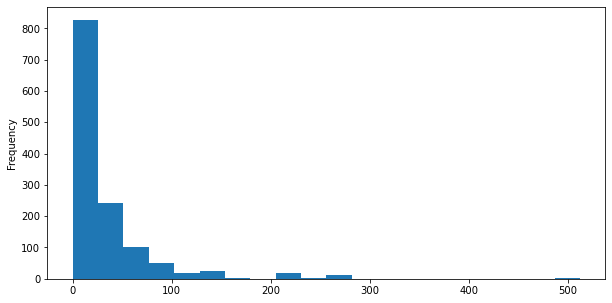

In [13]:
titanic_data["Fare"].plot.hist(bins=20, figsize=(10,5))

# Data Wrangling

In [14]:
cleaned_data_set.isnull()

,Pclass,Survived,Sex,Age,Fare,Embarked
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1304,False,False,False,False,False,False
1305,False,False,False,True,False,False
1306,False,False,False,False,False,False
1307,False,False,False,False,False,False


In [15]:
cleaned_data_set.isnull().sum()

Pclass        0
Survived      0
Sex           0
Age         263
Fare          1
Embarked      2
dtype: int64

<AxesSubplot:>

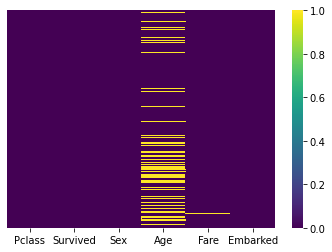

In [16]:
sns.heatmap(cleaned_data_set.isnull(), yticklabels=False, cmap="viridis")   # yellow area represents null values

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

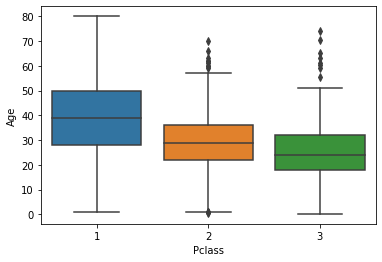

In [17]:
sns.boxplot(x="Pclass", y="Age", data=titanic_data)

In [18]:
cleaned_data_set.dropna(inplace=True)    # Dropping all the null values

<AxesSubplot:>

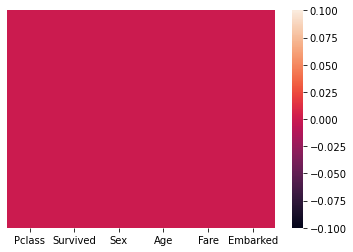

In [19]:
sns.heatmap(cleaned_data_set.isnull(), yticklabels=False) 

In [20]:
cleaned_data_set.isnull().sum()

Pclass      0
Survived    0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [21]:
sex= pd.get_dummies(titanic_data['Sex'], drop_first=True)
sex.head()

,male
0,0
1,1
2,0
3,1
4,0


In [22]:
embark= pd.get_dummies(titanic_data['Embarked'])
embark.head()

,C,Q,S
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [23]:
Pcl= pd.get_dummies(titanic_data['Pclass'])
Pcl.head()

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [24]:
final_data= pd.concat([cleaned_data_set,sex,embark,Pcl], axis=1)

In [25]:
final_data1= final_data.drop(columns=['Pclass', 'Sex', 'Embarked'], axis= 1)
final_data1.head()

,Survived,Age,Fare,male,C,Q,S,1,2,3
0,1.0,29.0000,211.3375,0,0,0,1,1,0,0
1,1.0,0.9167,151.5500,1,0,0,1,1,0,0
2,0.0,2.0000,151.5500,0,0,0,1,1,0,0
3,0.0,30.0000,151.5500,1,0,0,1,1,0,0
4,0.0,25.0000,151.5500,0,0,0,1,1,0,0


In [26]:
final_data1.isnull().any()

Survived     True
Age          True
Fare         True
male        False
C           False
Q           False
S           False
1           False
2           False
3           False
dtype: bool

In [27]:
final_data2= final_data1.fillna(method='ffill')

In [28]:
final_data2.isnull().any()

Survived    False
Age         False
Fare        False
male        False
C           False
Q           False
S           False
1           False
2           False
3           False
dtype: bool

# Training data

In [29]:
x = final_data2.drop(columns=["Survived"], axis=1)           # all columns except'Survived' column
y = final_data2["Survived"]                       # Survived column

In [30]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size= 0.3, random_state= 0)

# splits train and test data in 70:30 ratio

In [31]:
#scaler = StandardScaler ()
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.fit_transform(x_test)

In [32]:
model = LogisticRegression (solver = 'liblinear')

model.fit (x_train, y_train)       # creating instance of Logistic model

LogisticRegression(solver='liblinear')

In [33]:
predictions= model.predict(x_test)          # making prediction on test data based on the fitted model

# Checking accuracy of model

In [34]:
report = classification_report (y_test, predictions)
print (report)      

              precision    recall  f1-score   support

         0.0       0.77      0.91      0.83       236
         1.0       0.82      0.59      0.69       157

    accuracy                           0.78       393
   macro avg       0.79      0.75      0.76       393
weighted avg       0.79      0.78      0.78       393



In [35]:
confusion_matrix(y_test, predictions)

array([[215,  21],
       [ 64,  93]], dtype=int64)

In [36]:
accuracy_score(y_test, predictions)

0.7837150127226463